## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

## Load the Data 

In [4]:
data = pd.read_excel('/kaggle/input/tweetxlsx/Tweet_NFT.xlsx')

In [5]:
data.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762.0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763.0,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765.0,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766.0,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767.0,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community


In [6]:
data.drop(['id','tweet_created_at'],axis=1,inplace=True)

In [7]:
data.head()

,tweet_text,tweet_intent
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,Community
1,Need Sick Character artâ_x009d_“#art #artist #...,Giveaway
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,Appreciation
3,@CryptoBatzNFT @DarekBTW The first project in ...,Community
4,@sashadysonn The first project in crypto with ...,Community


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127453 entries, 0 to 127452
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   tweet_text    127453 non-null  object
 1   tweet_intent  96364 non-null   object
dtypes: object(2)
memory usage: 1.9+ MB


## Text(tweet) Preprocessing

In [9]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [10]:
#remove tag from each tweet

data['clean_tweet'] = np.vectorize(remove_pattern)(data['tweet_text'], "@[\w]*")

In [11]:
data.head()

,tweet_text,tweet_intent,clean_tweet
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,Community,ðŸ_x0090_¶ A new cryptocurrency ...
1,Need Sick Character artâ_x009d_“#art #artist #...,Giveaway,Need Sick Character artâ_x009d_“#art #artist #...
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,Appreciation,Great choice on a Tesla! Good luck!
3,@CryptoBatzNFT @DarekBTW The first project in ...,Community,The first project in crypto with move to ear...
4,@sashadysonn The first project in crypto with ...,Community,The first project in crypto with move to earn...


In [12]:
# remove special characters, numbers and punctuations

data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
data.head()

,tweet_text,tweet_intent,clean_tweet
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,Community,x A new cryptocurrency ...
1,Need Sick Character artâ_x009d_“#art #artist #...,Giveaway,Need Sick Character art x d #art #artist #...
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,Appreciation,Great choice on a Tesla Good luck
3,@CryptoBatzNFT @DarekBTW The first project in ...,Community,The first project in crypto with move to ear...
4,@sashadysonn The first project in crypto with ...,Community,The first project in crypto with move to earn...


In [13]:
# remove short words

data['clean_tweet'] = data['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
data.head()

,tweet_text,tweet_intent,clean_tweet
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,Community,cryptocurrency born fans Chihuahua meme commun...
1,Need Sick Character artâ_x009d_“#art #artist #...,Giveaway,Need Sick Character #art #artist #Artists #ani...
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,Appreciation,Great choice Tesla Good luck
3,@CryptoBatzNFT @DarekBTW The first project in ...,Community,first project crypto with move earn #AstroBird...
4,@sashadysonn The first project in crypto with ...,Community,first project crypto with move earn #AstroBird...


In [14]:
# individual words considered as tokens

tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [cryptocurrency, born, fans, Chihuahua, meme, ...
1    [Need, Sick, Character, #art, #artist, #Artist...
2                   [Great, choice, Tesla, Good, luck]
3    [first, project, crypto, with, move, earn, #As...
4    [first, project, crypto, with, move, earn, #As...
Name: clean_tweet, dtype: object

In [15]:
#Lemmatize the words
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
 
tokenized_tweet = tokenized_tweet.apply(lambda sentence : [wnl.lemmatize(words) for words in sentence])
tokenized_tweet.head()

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


0    [cryptocurrency, born, fan, Chihuahua, meme, c...
1    [Need, Sick, Character, #art, #artist, #Artist...
2                   [Great, choice, Tesla, Good, luck]
3    [first, project, crypto, with, move, earn, #As...
4    [first, project, crypto, with, move, earn, #As...
Name: clean_tweet, dtype: object

In [16]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
data['clean_tweet'] = tokenized_tweet
data.head(10)

,tweet_text,tweet_intent,clean_tweet
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,Community,cryptocurrency born fan Chihuahua meme communi...
1,Need Sick Character artâ_x009d_“#art #artist #...,Giveaway,Need Sick Character #art #artist #Artists #ani...
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,Appreciation,Great choice Tesla Good luck
3,@CryptoBatzNFT @DarekBTW The first project in ...,Community,first project crypto with move earn #AstroBird...
4,@sashadysonn The first project in crypto with ...,Community,first project crypto with move earn #AstroBird...
5,ðŸŽ‰ Just registered for the saphire on @PREMI...,Presale,Just registered saphire http lNIXaPFL
6,ðŸš¨ THE BRIDGED #4660/9999 SOLD!!! =&gt; PRIC...,Giveaway,BRIDGED SOLD PRICE RANK RANK OWNER rFNh sSjGcJ...
7,@mtnDAO PROJECT 21 - THE BEST GAMEFI PROJECT O...,Whitelist,PROJECT BEST GAMEFI PROJECT Multistage deflati...
8,@Ra8bitsNFT Feature it on @Globalnft07\nWe hav...,Community,Feature have great community artist collector
9,@SpaceBrosBSC PROJECT 21 - THE BEST GAMEFI PRO...,Whitelist,PROJECT BEST GAMEFI PROJECT Multistage deflati...


## Exploratory Data Analysis

In [17]:
list1 = list(data.tweet_intent.unique())
list1.remove(np.nan)
list1

['Community',
 'Giveaway',
 'Appreciation',
 'Presale',
 'Whitelist',
 'pinksale',
 'Done',
 'Interested',
 'Launching Soon']

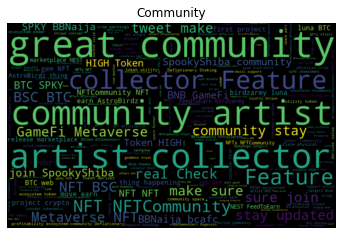

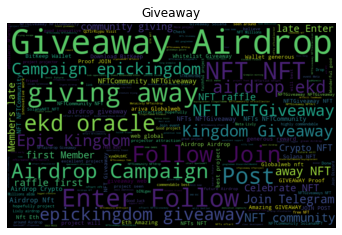

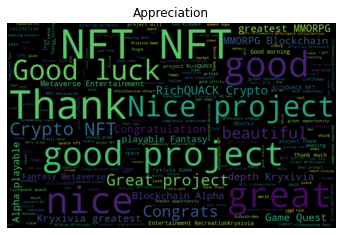

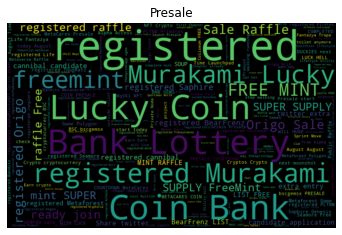

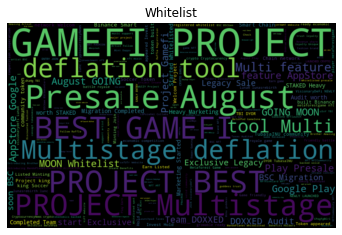

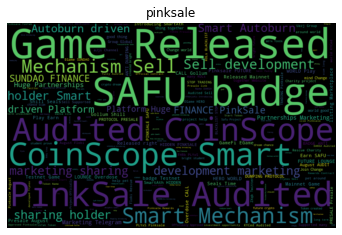

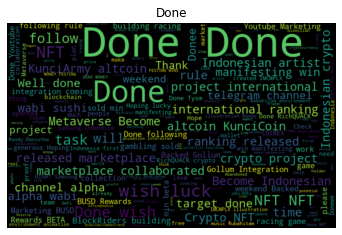

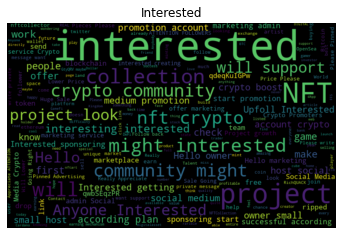

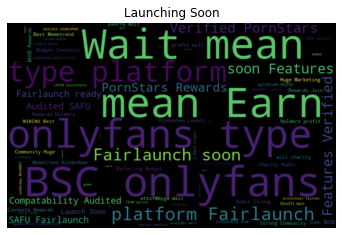

In [82]:
# visualize the frequent words
for i in list1:
    all_words = " ".join([sentence for sentence in data['clean_tweet'][data['tweet_intent']==i]])
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
    # plot the graph
    plt.figure(figsize=(20,20))
    cnt = 1
    plt.subplot(3, 3, cnt)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title (i, loc='center')
    plt.axis('off')
    plt.show()
    cnt = cnt+1

In [19]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags  

In [20]:
# #extract hastags from Community tweets
ht_Community = hashtag_extract(data['clean_tweet'][data['tweet_intent']=='Community'])

# extract hashtags from Giveaway tweets
ht_Giveaway = hashtag_extract(data['clean_tweet'][data['tweet_intent']=='Giveaway'])

# extract hashtags from Appreciation tweets
ht_Appreciation = hashtag_extract(data['clean_tweet'][data['tweet_intent']=='Appreciation'])

# extract hashtags from Presale tweets
ht_Presale = hashtag_extract(data['clean_tweet'][data['tweet_intent']=='Presale'])

# extract hashtags from Whitelist tweets
ht_Whitelist = hashtag_extract(data['clean_tweet'][data['tweet_intent']=='Whitelist'])

# extract hashtags from pinksale tweets
ht_pinksale = hashtag_extract(data['clean_tweet'][data['tweet_intent']=='pinksale'])

# extract hashtags from Done tweets
ht_Done = hashtag_extract(data['clean_tweet'][data['tweet_intent']=='Giveaway'])

# extract hashtags from Interested tweets
ht_Interested = hashtag_extract(data['clean_tweet'][data['tweet_intent']=='Interested'])

# extract hashtags from Launching Soon tweets
ht_Launching_Soon = hashtag_extract(data['clean_tweet'][data['tweet_intent']=='Launching Soon'])

In [21]:
# unnest list
ht_Community = sum(ht_Community, [])
ht_Giveaway = sum(ht_Giveaway, [])
ht_Appreciation = sum(ht_Appreciation, [])
ht_Presale = sum(ht_Presale, [])
ht_Whitelist = sum(ht_Whitelist, [])
ht_pinksale = sum(ht_pinksale, [])
ht_Done = sum(ht_Done, [])
ht_Interested = sum(ht_Interested, [])
ht_Launching_Soon = sum(ht_Launching_Soon, [])

In [22]:
freq = nltk.FreqDist(ht_Community)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,AstroBirdz,1411
1,NEST,1410
2,FeedToEarn,1411
3,birdzarmy,1411
4,luna,1411


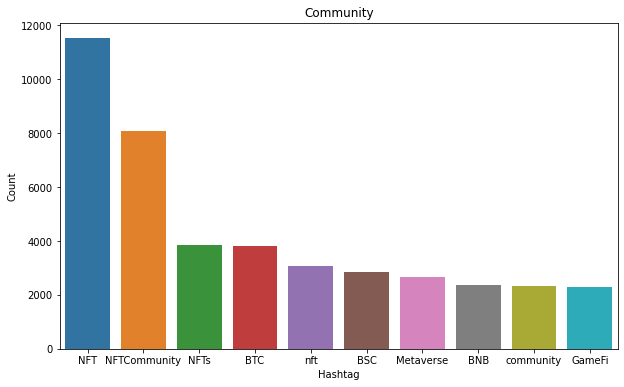

In [23]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(10,6))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.title('Community',loc='center')
plt.show()

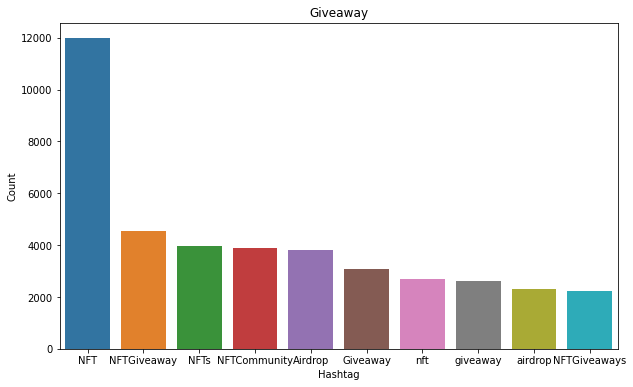

In [24]:
freq = nltk.FreqDist(ht_Giveaway)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(10,6))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.title('Giveaway',loc='center')
plt.show()

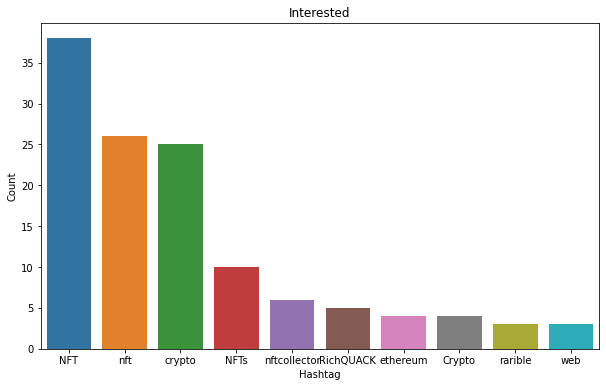

In [81]:
freq = nltk.FreqDist(ht_Interested)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(10,6))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.title('Interested',loc='center')
plt.show()

## Fearture Engineering

In [25]:
# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000, stop_words='english')
vector = tfidf.fit_transform(data['clean_tweet'])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(vector[0:96364], data['tweet_intent'][0:96364], random_state=42, test_size=0.25)

## Model Selection

### 1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [28]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [29]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred,average='weighted')

0.9435616724510153

In [30]:
accuracy_score(y_test,pred)

0.9435888921173883

In [31]:
final_df = data[data.tweet_intent.isnull() == True]

In [32]:
final_df['Predicted Intend'] = model.predict(vector[96364:127453])

In [33]:
final_df.sample(10)

,tweet_text,tweet_intent,clean_tweet,Predicted Intend
112503,@NFTKingForever ðŸ”´NEW DROPðŸ”´\n\nour collec...,NaN,DROP collection ready will like these Pirce ht...,Community
125873,@Lali_NFT Who is this again? This is not Brown...,NaN,this again This Brown,Done
110711,@MicrowaveETH I think this means you are an NF...,NaN,think this mean influencer,Appreciation
124015,@1kz3ro @UNLEASHED_NFT Golden opportunity ðŸ¥°...,NaN,Golden opportunity,Done
111626,@SteadyMobbin365 Sorry about your lost contact...,NaN,Sorry about your lost contact http dekzVlFT he...,Appreciation
113109,"Crypto Weekly Roundup: Nomad Hacked, Solana Wa...",NaN,Crypto Weekly Roundup Nomad Hacked Solana Wall...,Appreciation
126978,@LilikMaryudi @allrunningdao Ape into @FlokiMo...,NaN,into ready pump launching their game holder wi...,Giveaway
114865,Top 12 #NFT Games to Play in 2022\n\nhttps://t...,NaN,#NFT Games Play http vIGJ SUUE,Whitelist
109086,AILOW Releases 'Noise' On Austin Kramers Label...,NaN,AILOW Releases Noise Austin Kramers Label With...,Done
106650,@NFTHUNTERZ_XYZ I noticed that I go to buy nft...,NaN,noticed that when mood when sincere positive e...,Appreciation


### 2. Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [36]:
y_pred = clf.predict(x_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result1)
result2 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result2)

Confusion Matrix:
[[ 3947    26    79    42     0     0     1    56     0]
 [   30 10167    32    23     0     0     1    67     0]
 [   23    21   668    10     0     0    10    41     0]
 [  110    47   107  4955     1     0     9    43     1]
 [    1     0     1     0    63     0     0     1     0]
 [    0     2     0     0     0    32     1     1     0]
 [    5     0    33    10     2     0  1182    11     0]
 [   70   186   109    47     1     0    27  1674     2]
 [    0     0     0     0     0     0     0     0   113]]
Classification Report:
                precision    recall  f1-score   support

  Appreciation       0.94      0.95      0.95      4151
     Community       0.97      0.99      0.98     10320
          Done       0.65      0.86      0.74       773
      Giveaway       0.97      0.94      0.96      5273
    Interested       0.94      0.95      0.95        66
Launching Soon       1.00      0.89      0.94        36
       Presale       0.96      0.95      0.96      1

### 3. Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
model_GBN = GaussianNB()
model_GBN.fit(x_train.toarray(), y_train)

GaussianNB()

In [39]:
ynew = model_GBN.predict(x_test.toarray())

In [40]:
accuracy_score(y_test,ynew)

0.7960649205097339

### 4. Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=300,criterion='gini', max_depth=300) 
classifier.fit(x_train, y_train) 

RandomForestClassifier(max_depth=300, n_estimators=300)

In [79]:
ynew = classifier.predict(x_test)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ynew)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ynew)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ynew) 
print("Accuracy:",result2)


Confusion Matrix:
[[ 3995    15    75    20     0     0     2    44     0]
 [   32 10232    23     9     0     0     1    23     0]
 [   21    17   667    13     0     0     9    46     0]
 [  107    53   105  4957     1     0     9    40     1]
 [    0     3     0     2    61     0     0     0     0]
 [    1     1     0     2     0    31     0     1     0]
 [    6     1    30     8     2     0  1183    13     0]
 [   78   192    94    43     1     0    20  1686     2]
 [    0     0     0     0     0     0     0     0   113]]
Classification Report:
                precision    recall  f1-score   support

  Appreciation       0.94      0.96      0.95      4151
     Community       0.97      0.99      0.98     10320
          Done       0.67      0.86      0.75       773
      Giveaway       0.98      0.94      0.96      5273
    Interested       0.94      0.92      0.93        66
Launching Soon       1.00      0.86      0.93        36
       Presale       0.97      0.95      0.96      1

### 5. Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gbr = GradientBoostingClassifier(n_estimators = 50, random_state = 42)
  
# Fit to training set
gbr.fit(x_train, y_train)
  
# Predict on test set
pred_y = gbr.predict(x_test)

In [47]:
result = accuracy_score(y_test,pred_y) 
print("Accuracy:",result)

Accuracy: 0.9173550288489477


## The Best Result is for Random Forest hence calculate the Blank Intend with Random Forest Classifier

In [85]:
final_df.drop('Predicted Intend',axis=1,inplace=True)

In [86]:
final_df.head()

,tweet_text,tweet_intent,clean_tweet
96364,15% off ðŸ§™â€_x008d_â™‚ï¸_x008f_ #Wizardia NF...,NaN,#Wizardia NFTs game magic filled metaverse Are...
96365,@asksabir007 @dao_lm Don't miss the chance to ...,NaN,miss chance worth Each Just simple step with c...
96366,This zesty faucet from @_bitcoiner is making m...,NaN,This zesty faucet from making tweet this claim...
96367,15% off ðŸ§™â€_x008d_â™‚ï¸_x008f_ #Wizardia NF...,NaN,#Wizardia NFTs game magic filled metaverse Are...
96368,"@Kavaboy_NFT @tanya_4d Message me, letâ€™s tal...",NaN,Message talk about some marketing your project


In [87]:
final_df['Predicted Intend'] = classifier.predict(vector[96364:127453])
final_df.sample(10)

,tweet_text,tweet_intent,clean_tweet,Predicted Intend
124270,@jalantathomas_ @damadril @LifesAJoke_NFT @Fkn...,NaN,Here this next http XlHV,Done
116053,The Nfts Will Reveal Soon @420x69IQ @Saadsaqib...,NaN,Nfts Will Reveal Soon http CkVQhMV,Whitelist
117820,@Agnes_rose3 New Project!! \nMetaHero is a col...,NaN,Project MetaHero collection hero native MetaHe...,Community
119491,@UNLEASHED_NFT Hey DM me Letâ€™s Collab ðŸ‘€,NaN,Collab,Done
107155,ðŸŸ¢ Buy $ALPACA [Spot Hourly]\n#ALPACAUSDT\nF...,NaN,ALPACA Spot Hourly #ALPACAUSDT Filled #ALPACA ...,Whitelist
100686,Every time a piece of #NFT doesn't sell insta...,NaN,Every time piece #NFT doesn sell instantly thi...,Appreciation
106102,@SpaceRiders_NFT @AkhilSesh Welcome @Akhilsesh...,NaN,Welcome #LetsRide http Bnuf EdHK,Appreciation
96377,Just remember this is the beginning. You never...,NaN,Just remember this beginning never late Spread...,Community
104805,This zesty faucet from @_bitcoiner is making m...,NaN,This zesty faucet from making tweet this claim...,Whitelist
101521,"@nft_finley I'm pediatric nurse, I create NFT ...",NaN,pediatric nurse create with sick child profit ...,Appreciation


In [90]:
import pickle
model = pickle.loads(pickle.dumps(classifier))

In [93]:
model.predict(vector[1].toarray())

array(['Giveaway'], dtype=object)